In [10]:
# Import pandas and plotting libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Scikit-Learn library for the regression models and confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

### Data

In [2]:
data = pd. read_csv("data.csv")

In [3]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)

### Classifier

In [4]:
logistic_reg = LogisticRegression(solver="lbfgs", max_iter=146) 
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=146)

### Logistic Regression Prediction (User Input)

In [5]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    test_data = pd.DataFrame(test_data).T
    y_log = logistic_reg.predict(test_data)
    
    return y_log

### Sample Train, Test, Split Results

In [6]:
def sample_results():
    '''
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_log = logistic_reg.predict(X_test)
    print("Mean accuracy on test set: ", logistic_reg.score(X_test, y_test))
    print(classification_report(y_test, y_log))
    print("The confusion matrix for the sample dataset using Logistic Regression is displayed below:")
    plot_confusion_matrix(logistic_reg, X_test, y_test)
    plt.show
    
    return

### Backward Feature selection 

In [8]:
#Defining Dataset Input Features and Outputs
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
   'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
   'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data.diagnosis

In [12]:
input_features_count = [1, 2, 3, 4, 5, 6, 7, 8, 9]

list_test_mse = []
list_test_R2 = []
list_test_accuracy = []

list_training_mse = []
list_training_R2 = []
list_training_accuracy = []

selected_features = []

classifier = LogisticRegression(solver="lbfgs", max_iter=10000) 

for count in input_features_count:
    sfs_backward = SequentialFeatureSelector(classifier,
                                         n_features_to_select=(count),
                                         direction='backward').fit(X, y)

    f_names = np.array(X.columns)
    selected = sfs_backward.get_support(indices=True)
    X_selected = data[f_names[selected]]
    selected_features.append(f_names[selected])
    X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    clf_LogisticReg = LogisticRegression(solver="lbfgs", max_iter=146) 
    clf_LogisticReg = clf_LogisticReg.fit(X_train_selected, y_train_selected)
    
    y_test_pred = clf_LogisticReg.predict(X_test_selected)
    list_test_mse.append(mean_squared_error(y_test_selected, y_test_pred))
    list_test_R2.append(r2_score(y_test_selected, y_test_pred))
    list_test_accuracy.append(accuracy_score(y_test_selected, y_test_pred))
    
    y_train_pred = clf_LogisticReg.predict(X_train_selected)
    list_training_mse.append(mean_squared_error(y_train_selected, y_train_pred))
    list_training_R2.append(r2_score(y_train_selected, y_train_pred))
    list_training_accuracy.append(accuracy_score(y_train_selected, y_train_pred))

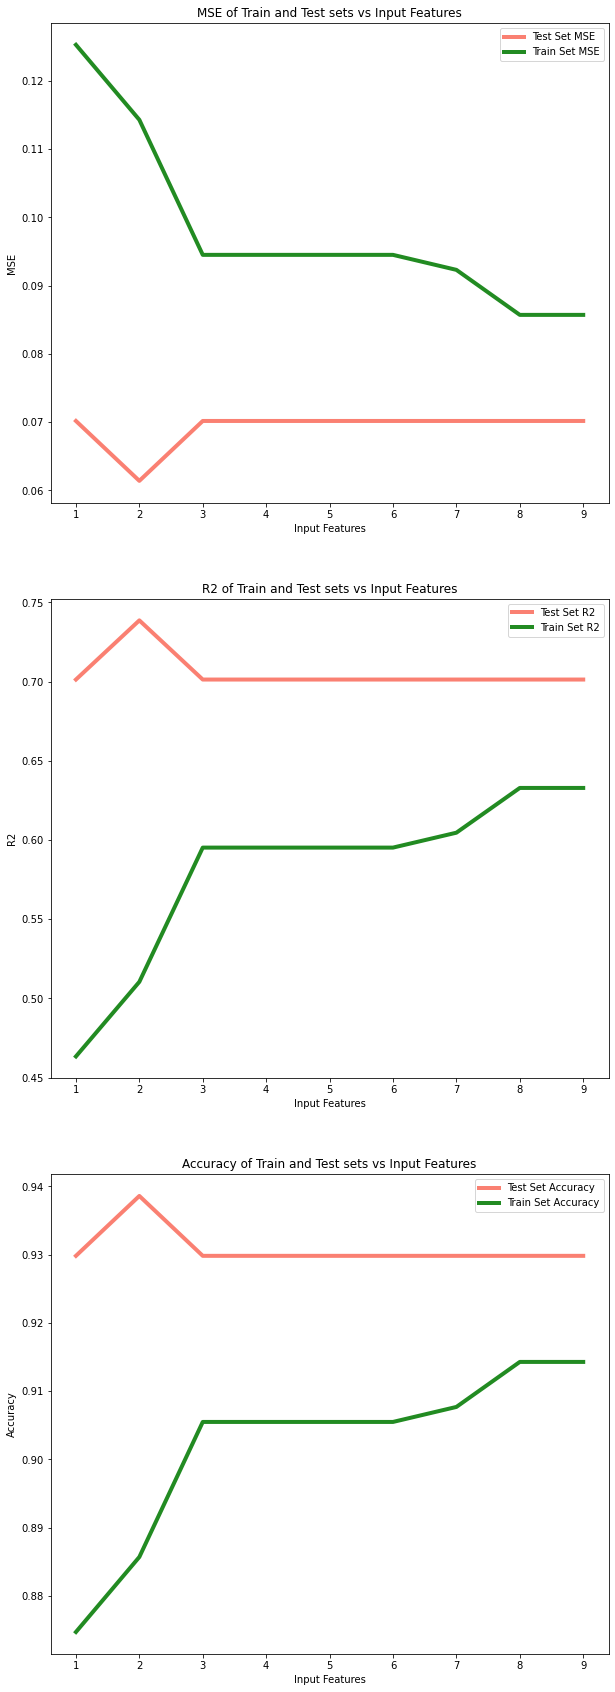

In [19]:
nrows = 3
fig = plt.figure(figsize=(10, nrows * 10))
ax = fig.subplots(nrows=nrows, ncols=1)

ax[0].plot(input_features_count, list_test_mse, label='Test Set MSE', c='salmon', linewidth=4)
ax[0].plot(input_features_count, list_training_mse, label='Train Set MSE', c='forestgreen', linewidth=4)
ax[0].set_xlabel('Input Features')
ax[0].set_ylabel('MSE')
ax[0].set_title('MSE of Train and Test sets vs Input Features')
ax[0].legend()

ax[1].plot(input_features_count, list_test_R2, label='Test Set R2', c='salmon', linewidth=4)
ax[1].plot(input_features_count, list_training_R2, label='Train Set R2', c='forestgreen', linewidth=4)
ax[1].set_xlabel('Input Features')
ax[1].set_ylabel('R2')
ax[1].set_title('R2 of Train and Test sets vs Input Features')
ax[1].legend()

ax[2].plot(input_features_count, list_test_accuracy, label='Test Set Accuracy', c='salmon', linewidth=4)
ax[2].plot(input_features_count, list_training_accuracy, label='Train Set Accuracy', c='forestgreen', linewidth=4)
ax[2].set_xlabel('Input Features')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Accuracy of Train and Test sets vs Input Features')
ax[2].legend()

In [17]:
selected_features[7]

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean'], dtype=object)

### Defining New, Optimized Classifier

In [20]:
def feature_names():
    '''
    Returns array of input features of best performing backwards stepwise selection test.
    '''
    
    return ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
           'compactness_mean', 'concave points_mean', 'symmetry_mean',
           'fractal_dimension_mean']

In [21]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    X = data[feature_names()]
    y = data.diagnosis
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    logistic_reg = LogisticRegression(solver="lbfgs", max_iter=146) 
    logistic_reg.fit(X_train, y_train)
    y_pred = logistic_reg.predict(test_data)
    
    return y_pred